Import required packages

In [1]:
import matplotlib.pyplot as plt
from utils import compile_ttl, get_data, sparql_to_df

Compile the ttl file

In [15]:
compile_ttl("ttl/bldg2.ttl")

/Users/roberto/Desktop/brick-data-retrieval-demo/venv/lib/python3.8/site-packages/brickschema/graph.py:212: UserWarning: Could not load Reasonable reasoner. Needs 'reasonable' option during install.
  warn(
/Users/roberto/Desktop/brick-data-retrieval-demo/venv/lib/python3.8/site-packages/brickschema/graph.py:222: UserWarning: Could not load Allegro reasoner. Needs 'allegro' option during install.
  warn(


loads the compiled brick schema ttl file

In [10]:
g = brickschema.Graph().load_file("ttl/bldg2.ttl-compiled.ttl")

Query datapoints

In [17]:
q = """
SELECT DISTINCT ?ahu ?sat ?sp ?satuuid ?spuuid WHERE {
   ?ahu  a  brick:AHU .
   ?ahu  brick:hasPoint  ?sat, ?sp .
   ?sat  a  brick:Supply_Air_Temperature_Sensor ;
         brick:timeseries [ brick:hasTimeseriesId ?satuuid ] .
   ?sp   a  brick:Supply_Air_Temperature_Setpoint ;
         brick:timeseries [ brick:hasTimeseriesId ?spuuid ]
}
"""
for row in g.query(q):
    print(row)

md = sparql_to_df(g, q)
md.head()

""


In [6]:
ahu, sat, sp, satuuid, spuuid = md.values[1]
df = get_data([satuuid, spuuid], ['sat', 'sp'])
print(df.head())

IndexError: index 1 is out of bounds for axis 0 with size 0

NameError: name 'df' is not defined

<Figure size 640x480 with 0 Axes>

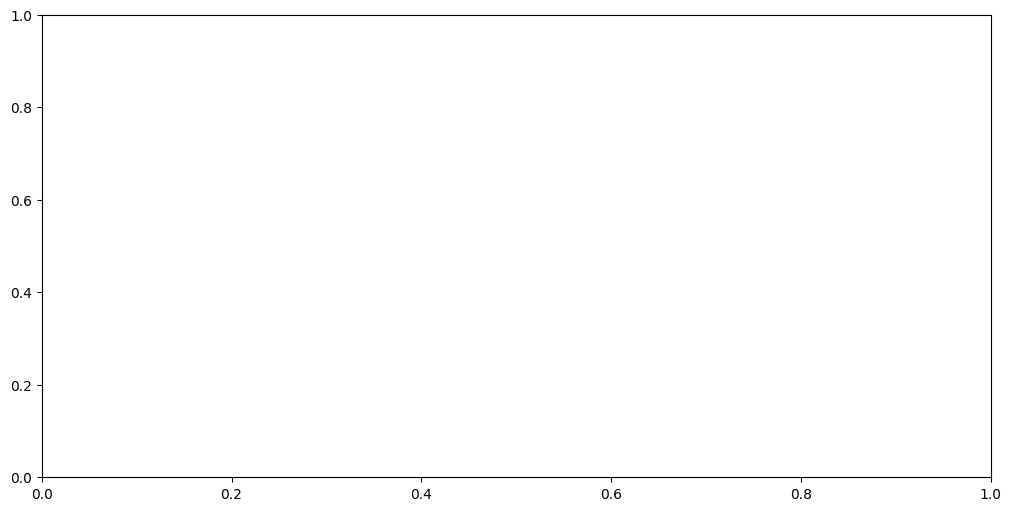

In [7]:

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')  # a figure with a single Axes
ax.plot(df['2012-06-01':'2012-06-5']['sp'], linestyle='-', label='Supply Air Temperature')
ax.plot(df['2012-06-01':'2012-06-5']['sat'], linestyle=':', label='Set Point Air Temperature')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [°F]');
ax.set_title("AHU Air temperature")  # Add a title to the axes.
ax.legend();  # Add a legend.
fig.show()